<a href="https://colab.research.google.com/github/yootina/Deep/blob/master/231219_Data_Analysis_Example_live_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리와 상관성/중요도 파악

### Preprocessing

In [ ]:
# import
# np, pd, (데이터처리) plt, sns (...시각화)
# sklearn. keras. tensorflow (전처리, 모델링...)
# import를 앞에 몰아서 할 필요는 X. 정리하는게 좋다. -> 정리하는것도...

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
# https://www.kaggle.com/datasets/patelprashant/employee-attrition
# 직원 퇴사 예측 데이터 (퇴사 여부 - Attrition (이직, 퇴사 여부))

# 업로드할 수 있으면 repository? local -> jupyter가 읽을 수 있는 경로
# colab -> google drive -> 데이터 업로드하는게 편함.
# kaggle 직접 다운로드 받을 수 있으면 해당 방식도... wget, kaggle 라이브러리.

# 외부에서 누가 접속을 해서 실행하는 경우를 가정. -> 여러분들 채용 담당자가 colab의 경우에는 실행을 해봄.
url = 'https://raw.githubusercontent.com/BigDeepData/2312_example/main/data/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url) # pd.read_csv -> encoding, skiprows... 설정.
df
# 머신러닝 분석, EDA 등 데이터 분석과 시각화 과제를 내주는 경우.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.info() # df.head(), tail(), describe...
# 1. 뭐가 y(label)이 될 것이냐?
# 2. 혹시 결측치가 있나?
# 3. 라벨인코딩, 원핫인코딩을 해야하나? (범주형 변수)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.nunique() # 어차피 값의 고유값이 1개라서 의미가 없는 열 정도만 drop
# EmployeeNumber -> 1470, 1470? -> id 값. -> drop.

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# 데이터프레임(df)에서 각 열의 고유한 값의 개수를 계산합니다.
unique_value_counts = df.nunique()

# 고유한 값의 개수가 1 이하인 열을 필터링합니다.
# Over18, StandardHours
# 이때, True 또는 False로 구성된 불리언 시리즈가 생성됩니다.
columns_to_drop = unique_value_counts[unique_value_counts <= 1]

# 고유한 값의 개수가 1 이하인 열의 인덱스를 리스트로 추출합니다.
columns_to_drop_indices = columns_to_drop.index.to_list()

# 추출한 열의 인덱스를 사용하여 해당 열들을 데이터프레임에서 제거합니다.
# axis=1은 열 방향을 의미합니다.
# inplace=True를 사용하여 원본 데이터프레임을 수정합니다.
df.drop(columns=columns_to_drop_indices, axis=1, inplace=True)

In [ ]:
df.drop('EmployeeNumber', axis=1, inplace=True) # 모든 행에 고유값인 id를 drop

In [ ]:
# label -> 0, 1로 인코딩. Yes -> 1, No -> 0
df['Attrition'] = df['Attrition'].eq('Yes')

In [ ]:
# 원래의 데이터(y label)의 분포.
df['Attrition'].mean() # 퇴사한 경우

0.16122448979591836

In [ ]:
1 - df['Attrition'].mean() # 퇴사 안한 경우 (84%)
# 정확도가 적어도 84%보다 높아야한다.

0.8387755102040817

In [ ]:
df_ = df.copy() # 혹시 몰라서 copy

In [ ]:
df_.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df = pd.get_dummies(
    df,
    columns=df.dtypes[df.dtypes == 'object'].index,
    drop_first=True) # 원핫인코딩

In [ ]:
# 스케일링 -> MinMax, Standard. (Boxplot 등 사용하여 이상치가 많이 발견되면 Robust)
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

### Correlation

<Axes: >

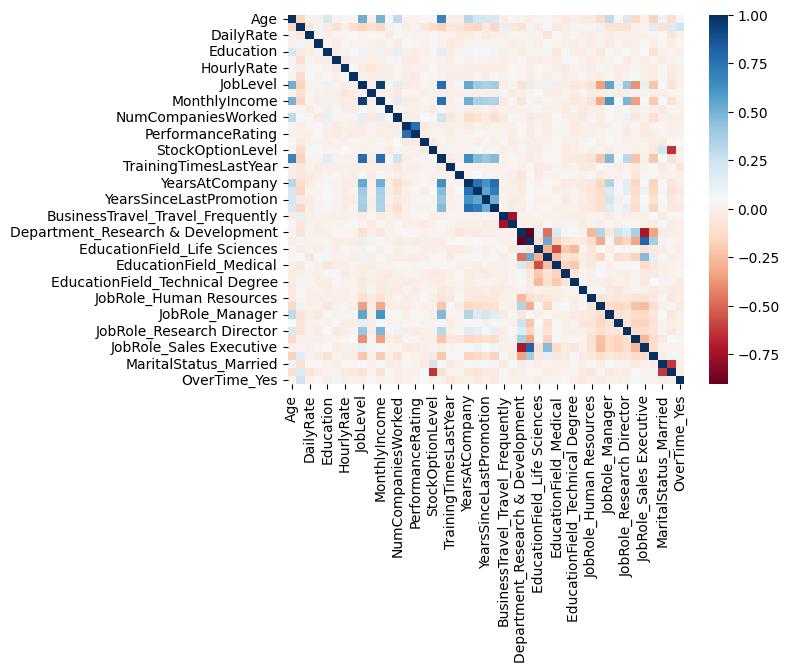

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# df.corr() -> 피어슨 상관계수 => 수치형 데이터들 간 둘의 상관관계(증감에 따라 서로 비례/반비례하는 관계?)
# 범주형 변수 -> 원핫인코딩을 함 -> 모든 열에 대한 상관계수를 구할 순 있음.
corr = scaled.corr()

sns.heatmap(corr, cmap='RdBu') # heatmap -> 어느부분이 도드라지게 상관관계가 보이나...

In [ ]:
# 목표가 되는 y 타깃변수와 다른 변수들 간의 상관관계
corr.Attrition.sort_values(ascending=False)[1:]
# y를 빨리 어떠한 연속형, 범주형이든 구체화를 해라...

OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences        -0.032703
YearsSinceLastPromotion           

In [ ]:
# abs : 절대값
# sort_values : 정렬, ascending=False : 내림차순, [1:] : 자기 자신 제외.
abs_attrition_corr = corr.Attrition.apply(abs).sort_values(ascending=False)[1:]
abs_attrition_corr.head(10) # feature selection -> 10? 20?만 추려서 예측.

OverTime_Yes                    0.246118
MaritalStatus_Single            0.175419
TotalWorkingYears               0.171063
JobLevel                        0.169105
YearsInCurrentRole              0.160545
MonthlyIncome                   0.159840
Age                             0.159205
JobRole_Sales Representative    0.157234
YearsWithCurrManager            0.156199
StockOptionLevel                0.137145
Name: Attrition, dtype: float64

In [ ]:
abs_attrition_corr
# 1. 절대적인 기준을 잡아서 -> 상관성이 0.01보다 커야...
# 2. 다음으로 넘어가다보면 갑자기 팍 줄어드는 경우
# xgboost나 lightgbm의 경우에는 열의 갯수로 인한 성능저하가 크진 않아요.
# pca나 다른 변환 비지도학습을 사용해서 갯수를 조정하는 방식...

OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
Department_Research & Development    0.085293
JobRole_Manager                      0.083316
JobRole_Manufacturing Director       0.082994
Department_Sales                  

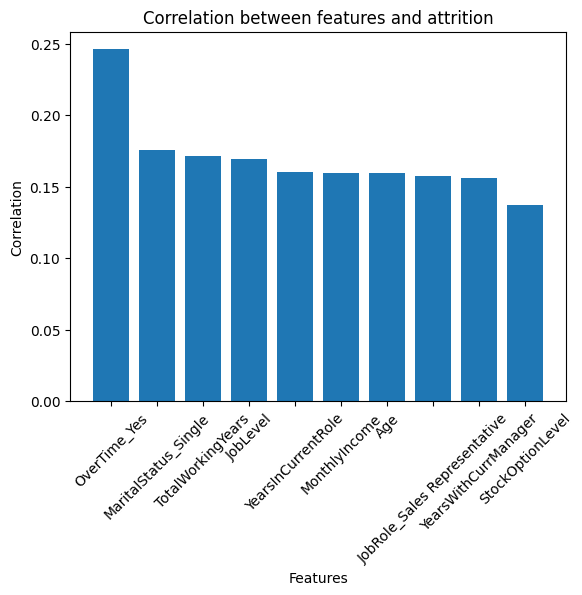

In [ ]:
#@title Matplotlib
abs_attrition_corr_top10 = abs_attrition_corr.head(10)
plt.bar(abs_attrition_corr_top10.index,
        abs_attrition_corr_top10.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between features and attrition')
plt.xticks(rotation=45)
plt.show()

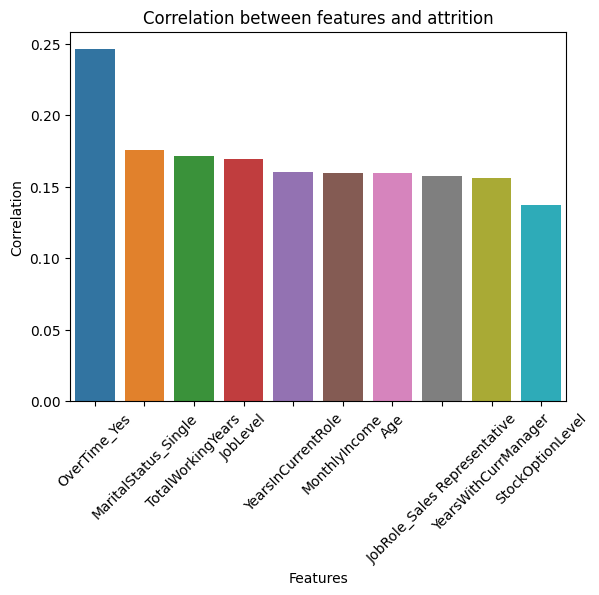

In [ ]:
#@title Seaborn
# 다양한 패키지를 모두 보여줘라? -> 내가 필요에 따라 여러 라이브러리를 활용할 수 있다.

sns.barplot(x=abs_attrition_corr_top10.index,
            y=abs_attrition_corr_top10.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between features and attrition')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#@title Plotly

import plotly.express as px

fig = px.bar(abs_attrition_corr_top10,
             x=abs_attrition_corr_top10.index,
             y=abs_attrition_corr_top10.values)
fig.show()

* 위의 상관성을 바탕으로 한 feature selection 진행하고, 해당 데이터를 바탕으로 해서 별도의 모델을 만들어보는 것도?
* 정확도를 높이거나, 오차를 줄이기 위해서 여러가지 데이터 기법과 모델링을 진행하는 직무
    * 한 번에 깔끔하게 하는 게 X
    * 주어진 데이터와 목표가 있다면 여러 가지 기법을 스스로, 혹은 절차에 맞춰서 진행할 수 있는 역량이 중요.
    * 모델링을 여러 접근 법으로 데이터/하이퍼패러미터/모델링 기법 등을 여러 가지로 접근한 기록, 포트폴리오, 내가 고민하거나 검증했던 방식들...

In [ ]:
X = scaled.drop('Attrition', axis=1)
y = scaled.Attrition
# 학습셋, 테스트셋.
X_train, X_test, y_train, y_test = train_test_split(X, y) # 최종은 아님
# 앞에까지의 처리 과정을 함수화하는 것도 괜찮음. + 다른 형태를 만들 수 있도록...

### Feautre Importances

In [ ]:
# RandomForest -> 트리모델의 경우에는 무슨 열(데이터)가 분류에 영향을 끼치는지를 확인.
from sklearn.ensemble import RandomForestClassifier
# rfc 자체를 예측모델로 안쓰더라도 중요한 feature 찾기 위해 탐색용으로도 사용 가능.
# Classifier : 분류할 때
# Regressor : 회귀(수치형 변수 예측)할 때

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# predict, 평가 X

RandomForestClassifier()

In [ ]:
# .feature_importances_ : 각각 변수별 중요도
# .feature_names_in_ : 각각 변수의 이름

ft = pd.Series(rf.feature_importances_,
          index=rf.feature_names_in_)\
    .sort_values(ascending=False) # 정렬(내림차순)
ft # 방향은 우리가 알 수 없음.
# 방향 -> Correlation 상관성 분석을 통해서 대략적으로 분석.
# 상대적으로 유의미하지 않은 열의 경우에는 drop을 하거나, pca -> 차원 축소.

MonthlyIncome                        0.077769
Age                                  0.061215
DailyRate                            0.054553
TotalWorkingYears                    0.051881
MonthlyRate                          0.050001
OverTime_Yes                         0.047914
HourlyRate                           0.044667
YearsAtCompany                       0.042506
DistanceFromHome                     0.040401
PercentSalaryHike                    0.034742
NumCompaniesWorked                   0.034211
EnvironmentSatisfaction              0.030776
StockOptionLevel                     0.028089
WorkLifeBalance                      0.026954
JobInvolvement                       0.026495
JobSatisfaction                      0.025013
YearsWithCurrManager                 0.024913
YearsInCurrentRole                   0.024247
TrainingTimesLastYear                0.023614
JobLevel                             0.023563
YearsSinceLastPromotion              0.022521
RelationshipSatisfaction          

In [ ]:
len(scaled.columns)

45

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)
# X_train_, X_test_
# feature selection, 전처리...

상관성 분석이랑 변수 중요도만 보라는 건 아님.  
적어도 Python/ML을 활용한 분석을 했을 경우에 다른 툴들에서는 분석하기 힘든 것들. -> 꼭 포함을 시켜라.

## 모델링과 하이퍼 패러미터 튜닝

### AutoML

In [ ]:
# https://github.com/microsoft/FLAML
!pip install flaml[notebook] -q # -q : 메시지 없이 조용하게 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.8 MB/s eta 0:00:00


In [ ]:
!pip install catboost -q # boosting 모델 중 하나

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


In [ ]:
# FLAML 라이브러리에서 AutoML을 가져옵니다.
from flaml import AutoML # 가이드 문서 찾아보면 잘 되어 있어서...
# Optuna 같은 하이퍼패러미터 튜너들과 비슷한 역할...

# Model -> Estimator.
# 최적의 추정기(estimator) 목록을 저장할 빈 리스트를 생성합니다.
best_estimators = []

# AutoML을 실행할 추정기(estimator) 목록을 정의합니다.
# https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#estimator
estimators = ['xgboost', 'lgbm', 'catboost', 'xgb_limitdepth', 'kneighbor']
# 모델을 여러개를 각각 써서 함.

# 각 추정기에 대한 AutoML을 실행합니다.
for e in estimators:
    print(e)

    # AutoML 객체를 생성하고, 사용할 추정기(estimator)를 지정합니다.
    automl = AutoML(estimator_list=[e])

    # AutoML 모델을 학습합니다.
    automl.fit(
        X_train=X_train_,  # 학습 데이터 (X_train_)를 지정합니다.
        y_train=y_train,    # 학습 레이블 (y_train)를 지정합니다.
        task='classification',  # 분류(classification) 작업을 수행합니다.
        time_budget=60,       # 총 시간 예산을 1분으로 설정합니다.
        # 1분 동안 하이퍼패러미터 튜닝을 해봄
        # 시간을 늘린다고해서 성능향성을 담보하진 않지만... 많은 경우 60*5 -> 5분.
        verbose=False          # 자세한 로그를 출력하지 않습니다.
    )
    # GridSearch, RandomSearch... 하이퍼패러미터튜닝을 해봐라... 권장...
    # 실제 대회나 분석에서는 이러한 툴들을 다 사용하기 때문에...
    # 어떠한 작용인지 '설명'할 수 있을 수준까지만 연습/포트폴리오에 표시 하고
    # 실제로는 이런 툴들을 많이 써봐라...

    # 최적의 하이퍼파라미터 구성을 출력합니다.
    print('Best hyperparameter config:', automl.best_config)

    # 검증 데이터에 대한 최적의 정확도를 출력합니다.
    print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))

    # 테스트 데이터에 대한 정확도를 계산하고 출력합니다.
    acc = accuracy_score(automl.model.predict(X_test_), y_test)
    print('Test accuracy : {0:.4g} '.format(acc))

    # 최적의 추정기와 모델을 저장합니다.
    best_estimators.append((e, automl.model))

# 최적의 추정기 목록을 반환합니다.
best_estimators

xgboost
Best hyperparameter config: {'n_estimators': 53, 'max_leaves': 5, 'min_child_weight': 5.5914923529439156, 'learning_rate': 0.22265705332447858, 'subsample': 0.8319822958037079, 'colsample_bylevel': 0.6869936708684089, 'colsample_bytree': 0.7346624238533789, 'reg_alpha': 0.006535953249353212, 'reg_lambda': 2.8567014580766052}
Best accuracy on validation data: 0.8459
Test accuracy : 0.894 
lgbm
Best hyperparameter config: {'n_estimators': 278, 'num_leaves': 5, 'min_child_samples': 82, 'learning_rate': 0.03465910953672366, 'log_max_bin': 10, 'colsample_bytree': 0.6649660897150012, 'reg_alpha': 0.12381045026190679, 'reg_lambda': 1.4046288020428923}
Best accuracy on validation data: 0.8428
Test accuracy : 0.8777 
catboost
Best hyperparameter config: {'early_stopping_rounds': 22, 'learning_rate': 0.025707975087860362, 'n_estimators': 103}
Best accuracy on validation data: 0.8397
Test accuracy : 0.8886 
xgb_limitdepth
Best hyperparameter config: {'n_estimators': 120, 'max_depth': 1, '

[('xgboost', <flaml.automl.model.XGBoostSklearnEstimator at 0x79ffb7d0bca0>),
 ('lgbm', <flaml.automl.model.LGBMEstimator at 0x79ff9b3fa110>),
 ('catboost', <flaml.automl.model.CatBoostEstimator at 0x79ff9aab40d0>),
 ('xgb_limitdepth',
  <flaml.automl.model.XGBoostLimitDepthEstimator at 0x79ff9aab4460>),
 ('kneighbor', <flaml.automl.model.KNeighborsEstimator at 0x79ff9ab25900>)]

### VotingClassifier

In [ ]:
# 여러개의 서로 다른 특성을 가진 모델을 만들어서
# 그 모델들의 결과를 취합해서 -> 최종 결과를 예측
from sklearn.ensemble import VotingClassifier
# 하드 보팅 : 다수결 (model1 : o, model2 : x .... -> o가 많으면 o, 아니면 x)
# 소프트 보팅 : 확률/수치 평균값 사용 (model1: o 80%, x 20%, model2 : o 60%, x 40%... -> 70%, 30%.)
# 마지막으로 여러 개의 모델을 합쳐서 조금이라도 정확도를 높이는데 사용

In [ ]:
# VotingClassifier를 생성합니다.
# `estimators`에는 이전에 학습한 최적의 추정기와 모델들을 사용합니다.
# `voting`은 하드 보팅(hard voting)을 지정합니다.
voting_clf_hard = VotingClassifier(
    estimators=best_estimators, voting='hard')

# VotingClassifier를 학습합니다.
voting_clf_hard.fit(X_train, y_train)

# VotingClassifier 모델을 사용하여 테스트 데이터에 대한 정확도를 계산합니다.
acc = accuracy_score(voting_clf_hard.predict(X_test), y_test)

# 테스트 데이터에 대한 정확도를 출력합니다.
print('Voting (Hard) Test accuracy : {0:.4g} '.format(acc))

# 오버피팅 방지 효과. 예측력 상승? k-fold. 일반화 성능 -> 새로운 데이터에 대한 개선

Voting (Hard) Test accuracy : 0.8859 


In [ ]:
# VotingClassifier를 생성합니다.
# `estimators`에는 이전에 학습한 최적의 추정기와 모델들을 사용합니다.
# `voting`은 소프트 보팅(soft voting)을 지정합니다.
# 예측되는 확률값 등을 평균.
# voting_clf_soft = VotingClassifier(
#     estimators=best_estimators, voting='soft')
voting_clf_soft = VotingClassifier(
    estimators=best_estimators[:-1], voting='soft') # KNN 제외

# VotingClassifier를 학습합니다.
voting_clf_soft.fit(X_train, y_train)

# VotingClassifier 모델을 사용하여 테스트 데이터에 대한 정확도를 계산합니다.
acc = accuracy_score(voting_clf_soft.predict(X_test), y_test)

# 테스트 데이터에 대한 정확도를 출력합니다.
print('Voting (Soft) Test accuracy : {0:.4g} '.format(acc))

Voting (Soft) Test accuracy : 0.894 


In [ ]:
# VotingClassifier를 생성합니다.
# `estimators`에는 이전에 학습한 최적의 추정기와 모델들 중에서 일부를 선택합니다.
# 선택한 추정기들은 best_estimators 리스트의 인덱스를 사용하여 지정합니다.
# `weights`를 통해 각 모델의 가중치를 지정합니다.
# `voting`은 소프트 보팅(soft voting)을 지정합니다.
voting_clf_soft = VotingClassifier(
    estimators=best_estimators,
    weights=[2.5, 1, 1, 1.4, 0.2], voting='soft') # 가중치를 조절을 하니 성능 개선

# VotingClassifier를 학습합니다.
voting_clf_soft.fit(X_train, y_train)

# VotingClassifier 모델을 사용하여 테스트 데이터에 대한 정확도를 계산합니다.
acc = accuracy_score(voting_clf_soft.predict(X_test), y_test)

# 테스트 데이터에 대한 정확도를 출력합니다.
print('Voting (Soft) Test accuracy : {0:.4g} '.format(acc))

Voting (Soft) Test accuracy : 0.8995 


### Model Saving (Joblib, Pickle)

In [ ]:
!pip install mlxtend -q # mlxtend -> joblib (colab, linux, mac?)
# window - local 일경우 joblib을 직접 설치

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler, 'scaler.pkl') # dump -> save => pkl (pickle)
joblib.dump(voting_clf_soft, 'voting.pkl')

['voting.pkl']

In [ ]:
# wget : 리눅스 등에서 파일을 다운로드 받을 때 쓰는 기능
# !wget https://github.com/BigDeepData/2312_example/raw/main/model/voting.pkl
# !wget https://github.com/BigDeepData/2312_example/raw/main/model/scaler.pkl

voting_model = joblib.load('voting.pkl')
scaler = joblib.load('scaler.pkl') # 스케일러도 훈련셋으로 되어 있는 걸 써야해서...

## 모델의 활용

### Form

In [ ]:
for col in df_.drop('Attrition', axis=1).columns:
    # if col in df_input:
    #     continue
    print(col) # 열 이름
    print(sorted(df_.loc[:, col].unique())) # 고유값
    print(min(df_.loc[:, col].unique())) # 최소값
    print(max(df_.loc[:, col].unique())) # 최대값

Age
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
18
60
BusinessTravel
['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Non-Travel
Travel_Rarely
DailyRate
[102, 103, 104, 105, 106, 107, 109, 111, 115, 116, 117, 118, 119, 120, 121, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 157, 160, 161, 163, 164, 167, 168, 170, 172, 174, 176, 177, 179, 180, 181, 182, 185, 188, 189, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 213, 216, 217, 218, 219, 224, 228, 230, 231, 232, 234, 237, 238, 240, 241, 243, 244, 247, 248, 249, 251, 252, 253, 254, 256, 258, 261, 263, 264, 265, 266, 267, 268, 269, 271, 277, 279, 280, 282, 285, 286, 287, 288, 289, 290, 294, 296, 299, 300, 301, 302, 303, 304, 305, 306, 307, 309, 310, 311, 313, 314, 316, 317, 318, 319, 322

In [ ]:
##@param <- colab에서 직접 데이터를 입력할 수 있는 폼을 호출하는 기능
# https://colab.research.google.com/notebooks/forms.ipynb
# 왼쪽 하단 <> : 코드 스니펫 -> Adding form fields

Age = 43 #@param{type: "slider", min: 18, max: 60}
BusinessTravel = 'Travel_Rarely' #@param['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
DailyRate = 1072 #@param{type: "slider", min: 102, max: 1499}
Department = 'Sales' #@param['Human Resources', 'Research & Development', 'Sales']
DistanceFromHome = 29 #@param{type: "slider", min: 1, max: 29}
Education = 1 #@param{type: "slider", min: 1, max: 5}
EducationField = 'Technical Degree' #@param['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
EnvironmentSatisfaction = 1 #@param{type: "slider", min: 1, max: 4}
Gender = 'Male' #@param['Female', 'Male']
HourlyRate = 30 #@param{type: "slider", min: 30, max: 100}
JobInvolvement = 1 #@param{type: "slider", min: 1, max: 4}
JobLevel = 3 #@param{type: "slider", min: 1, max: 5}
JobRole = 'Human Resources' #@param['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
JobSatisfaction = 1 #@param{type: "slider", min: 1, max: 4}
MaritalStatus = 'Single' #@param['Divorced', 'Married', 'Single']
MonthlyIncome = 10920 #@param{type: "slider", min: 1000, max: 20000}
MonthlyRate = 12540 #@param{type: "slider", min: 2000, max: 30000}
NumCompaniesWorked = 4 #@param{type: "slider", min: 0, max: 9}
OverTime = 'Yes' #@param['No', 'Yes']
PercentSalaryHike = 21 #@param{type: "slider", min: 10, max: 30}
PerformanceRating = 2 #@param{type: "slider", min: 1, max: 4}
RelationshipSatisfaction = 1 #@param{type: "slider", min: 1, max: 4}
StockOptionLevel = 2 #@param{type: "slider", min: 0, max: 3}
TotalWorkingYears = 22 #@param{type: "slider", min: 0, max: 40}
TrainingTimesLastYear = 2 #@param{type: "slider", min: 0, max: 6}
WorkLifeBalance = 3 #@param{type: "slider", min: 1, max: 4}
YearsAtCompany = 25 #@param{type: "slider", min: 0, max: 40}
YearsInCurrentRole = 11 #@param{type: "slider", min: 0, max: 20}
YearsSinceLastPromotion = 10 #@param{type: "slider", min: 0, max: 20}
YearsWithCurrManager = 6 #@param{type: "slider", min: 0, max: 20}

custom_input = pd.DataFrame([dict(
    Age=Age,
    BusinessTravel=BusinessTravel,
    DailyRate=DailyRate,
    Department=Department,
    DistanceFromHome=DistanceFromHome,
    Education=Education,
    EducationField=EducationField,
    EnvironmentSatisfaction=EnvironmentSatisfaction,
    Gender=Gender,
    HourlyRate=HourlyRate,
    JobInvolvement=JobInvolvement,
    JobLevel=JobLevel,
    JobRole=JobRole,
    JobSatisfaction=JobSatisfaction,
    MaritalStatus=MaritalStatus,
    MonthlyIncome=MonthlyIncome,
    MonthlyRate=MonthlyRate,
    NumCompaniesWorked=NumCompaniesWorked,
    OverTime=OverTime,
    PercentSalaryHike=PercentSalaryHike,
    PerformanceRating=PerformanceRating,
    RelationshipSatisfaction=RelationshipSatisfaction,
    StockOptionLevel=StockOptionLevel,
    TotalWorkingYears=TotalWorkingYears,
    TrainingTimesLastYear=TrainingTimesLastYear,
    WorkLifeBalance=WorkLifeBalance,
    YearsAtCompany=YearsAtCompany,
    YearsInCurrentRole=YearsInCurrentRole,
    YearsSinceLastPromotion=YearsSinceLastPromotion,
    YearsWithCurrManager=YearsWithCurrManager,
)])

custom_input

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,43,Travel_Rarely,1072,Sales,29,1,Technical Degree,1,Male,30,...,2,1,2,22,2,3,25,11,10,6


In [ ]:
# 전처리를 실행하고 (데이터 인코딩-범주형 변수 처리, 스케일링)
X_input = pd.get_dummies(
    pd.concat([df_.drop('Attrition', axis=1),custom_input],
              ignore_index=True),
    columns=df_.dtypes[df_.dtypes == 'object'].index,
    drop_first=True).iloc[[-1]]
X_input = scaler.transform(X_input) # scaler <- 아까 저장한 이유
X_input

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.73933649e-04,  1.12049789e+00,  1.00000000e+00,
        -7.14285714e-02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00]])

### Prediction

In [ ]:
import plotly.express as px

Age = 51 #@param{type: "slider", min: 18, max: 60}
BusinessTravel = 'Non-Travel' #@param['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
DailyRate = 1001 #@param{type: "slider", min: 102, max: 1499}
Department = 'Sales' #@param['Human Resources', 'Research & Development', 'Sales']
DistanceFromHome = 1 #@param{type: "slider", min: 1, max: 29}
Education = 5 #@param{type: "slider", min: 1, max: 5}
EducationField = 'Other' #@param['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
EnvironmentSatisfaction = 4 #@param{type: "slider", min: 1, max: 4}
Gender = 'Female' #@param['Female', 'Male']
HourlyRate = 92 #@param{type: "slider", min: 30, max: 100}
JobInvolvement = 3 #@param{type: "slider", min: 1, max: 4}
JobLevel = 4 #@param{type: "slider", min: 1, max: 5}
JobRole = 'Manager' #@param['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
JobSatisfaction = 4 #@param{type: "slider", min: 1, max: 4}
MaritalStatus = 'Married' #@param['Divorced', 'Married', 'Single']
MonthlyIncome = 19833 #@param{type: "slider", min: 1000, max: 20000}
MonthlyRate = 30000 #@param{type: "slider", min: 2000, max: 30000}
NumCompaniesWorked = 9 #@param{type: "slider", min: 0, max: 9}
OverTime = 'No' #@param['No', 'Yes']
PercentSalaryHike = 28 #@param{type: "slider", min: 10, max: 30}
PerformanceRating = 4 #@param{type: "slider", min: 1, max: 4}
RelationshipSatisfaction = 4 #@param{type: "slider", min: 1, max: 4}
StockOptionLevel = 2 #@param{type: "slider", min: 0, max: 3}
TotalWorkingYears = 31 #@param{type: "slider", min: 0, max: 40}
TrainingTimesLastYear = 5 #@param{type: "slider", min: 0, max: 6}
WorkLifeBalance = 4 #@param{type: "slider", min: 1, max: 4}
YearsAtCompany = 36 #@param{type: "slider", min: 0, max: 40}
YearsInCurrentRole = 16 #@param{type: "slider", min: 0, max: 20}
YearsSinceLastPromotion = 15 #@param{type: "slider", min: 0, max: 20}
YearsWithCurrManager = 16 #@param{type: "slider", min: 0, max: 20}

custom_input = pd.DataFrame([dict(
    Age=Age,
    BusinessTravel=BusinessTravel,
    DailyRate=DailyRate,
    Department=Department,
    DistanceFromHome=DistanceFromHome,
    Education=Education,
    EducationField=EducationField,
    EnvironmentSatisfaction=EnvironmentSatisfaction,
    Gender=Gender,
    HourlyRate=HourlyRate,
    JobInvolvement=JobInvolvement,
    JobLevel=JobLevel,
    JobRole=JobRole,
    JobSatisfaction=JobSatisfaction,
    MaritalStatus=MaritalStatus,
    MonthlyIncome=MonthlyIncome,
    MonthlyRate=MonthlyRate,
    NumCompaniesWorked=NumCompaniesWorked,
    OverTime=OverTime,
    PercentSalaryHike=PercentSalaryHike,
    PerformanceRating=PerformanceRating,
    RelationshipSatisfaction=RelationshipSatisfaction,
    StockOptionLevel=StockOptionLevel,
    TotalWorkingYears=TotalWorkingYears,
    TrainingTimesLastYear=TrainingTimesLastYear,
    WorkLifeBalance=WorkLifeBalance,
    YearsAtCompany=YearsAtCompany,
    YearsInCurrentRole=YearsInCurrentRole,
    YearsSinceLastPromotion=YearsSinceLastPromotion,
    YearsWithCurrManager=YearsWithCurrManager,
)])

X_input = pd.get_dummies(
    pd.concat([df_.drop('Attrition', axis=1),custom_input],
              ignore_index=True),
    columns=df_.dtypes[df_.dtypes == 'object'].index,
    drop_first=True).iloc[[-1]]
X_input = scaler.transform(X_input)

# voting_model # 훈련했던 모델
pred = voting_model.predict(X_input)[0]
# 0 또는 1 -> False, True -> 삼항연산자 사용
print(f'이 사람은 퇴사 {"한다" if pred else "안 한다"}')

proba = voting_model.predict_proba(X_input)[0]
print(f'퇴사 확률 : {proba[1]*100:.4f}%')

fig = px.pie(values=proba, names=['안 퇴사', '퇴사'])
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



이 사람은 퇴사 한다
퇴사 확률 : 70.2952%


In [ ]:
from google.colab import files

# files.download() <- 예시 csv 파일을 입력하게 하고...
# files.upload() <- csv 파일을 업로드 받아서....